# Prueba Fixed Rate Bond 

In [1]:
import QC_Financial as qcf

In [2]:
start_date = qcf.QCDate(1, 3, 2018)
end_date = qcf.QCDate(1, 3, 2023)

In [3]:
end_date_adj = qcf.BusyAdjRules.NO

In [4]:
periodicity = qcf.Tenor('6M')

In [5]:
stub_period = qcf.StubPeriod.NO

In [6]:
calendar = qcf.BusinessCalendar(start_date, 20)

In [7]:
yf = qcf.QC30360()
wf = qcf.QCLinearWf()

In [8]:
rate = qcf.QCInterestRate(.04, yf, wf)

In [9]:
fixed_rate_leg = qcf.LegFactory.build_bullet_fixed_rate_leg(qcf.RecPay.RECEIVE,
                                                           start_date,
                                                           end_date,
                                                           end_date_adj,
                                                           periodicity,
                                                           stub_period,
                                                           calendar,
                                                           0,
                                                           100,
                                                           True,
                                                           rate,
                                                           qcf.QCCLP())

In [10]:
for i in range(0, fixed_rate_leg.size()):
    print qcf.show(fixed_rate_leg.get_cashflow_at(i))

('2018-03-01', '2018-09-01', '2018-09-03', 100.0, 0.0, 2.0000000000000018, True, 2.0000000000000018, 'CLP', 0.04, 'Lin30360')
('2018-09-01', '2019-03-01', '2019-03-01', 100.0, 0.0, 2.0000000000000018, True, 2.0000000000000018, 'CLP', 0.04, 'Lin30360')
('2019-03-01', '2019-09-01', '2019-09-02', 100.0, 0.0, 2.0000000000000018, True, 2.0000000000000018, 'CLP', 0.04, 'Lin30360')
('2019-09-01', '2020-03-01', '2020-03-02', 100.0, 0.0, 2.0000000000000018, True, 2.0000000000000018, 'CLP', 0.04, 'Lin30360')
('2020-03-01', '2020-09-01', '2020-09-01', 100.0, 0.0, 2.0000000000000018, True, 2.0000000000000018, 'CLP', 0.04, 'Lin30360')
('2020-09-01', '2021-03-01', '2021-03-01', 100.0, 0.0, 2.0000000000000018, True, 2.0000000000000018, 'CLP', 0.04, 'Lin30360')
('2021-03-01', '2021-09-01', '2021-09-01', 100.0, 0.0, 2.0000000000000018, True, 2.0000000000000018, 'CLP', 0.04, 'Lin30360')
('2021-09-01', '2022-03-01', '2022-03-01', 100.0, 0.0, 2.0000000000000018, True, 2.0000000000000018, 'CLP', 0.04, 'Lin

In [11]:
BTP0400323 = qcf.FixedRateBond(fixed_rate_leg)

In [12]:
fecha_devengo = qcf.QCDate(14, 6, 2018)

In [13]:
BTP0400323.accrued_interest(fecha_devengo)

1.1444444444444368

In [14]:
tera_yf = qcf.QCAct365()
tera_wf = qcf.QCCompoundWf()
tera_valor = 0.040373
tera = qcf.QCInterestRate(tera_valor, tera_yf, tera_wf)

In [15]:
BTP0400323 = qcf.ChileanFixedRateBond(fixed_rate_leg, tera)

In [29]:
valor_par = BTP0400323.valor_par(fecha_devengo)
print round(valor_par * 100) / 100

101.15


In [17]:
tir_valor = 0.041
ytm = qcf.QCInterestRate(tir_valor, tera_yf, tera_wf)

In [18]:
pres_val = qcf.PresentValue()

In [19]:
valor_pres = pres_val.pv(fecha_devengo, fixed_rate_leg, ytm)
print valor_pres

100.882975479


In [28]:
precio = BTP0400323.precio(fecha_devengo, ytm)
print round(precio * 10000) / 100

99.74


In [21]:
moneda = qcf.QCCLP()

In [22]:
monto = BTP0400323.valor_pago(1000000, moneda, fecha_devengo, ytm)
print monto

1008821.0


In [23]:
duracion = BTP0400323.duracion()
print round(duracion * 100) / 100

4.3


In [26]:
convexidad = BTP0400323.convexidad()
print round(convexidad * 100) / 100

22.07


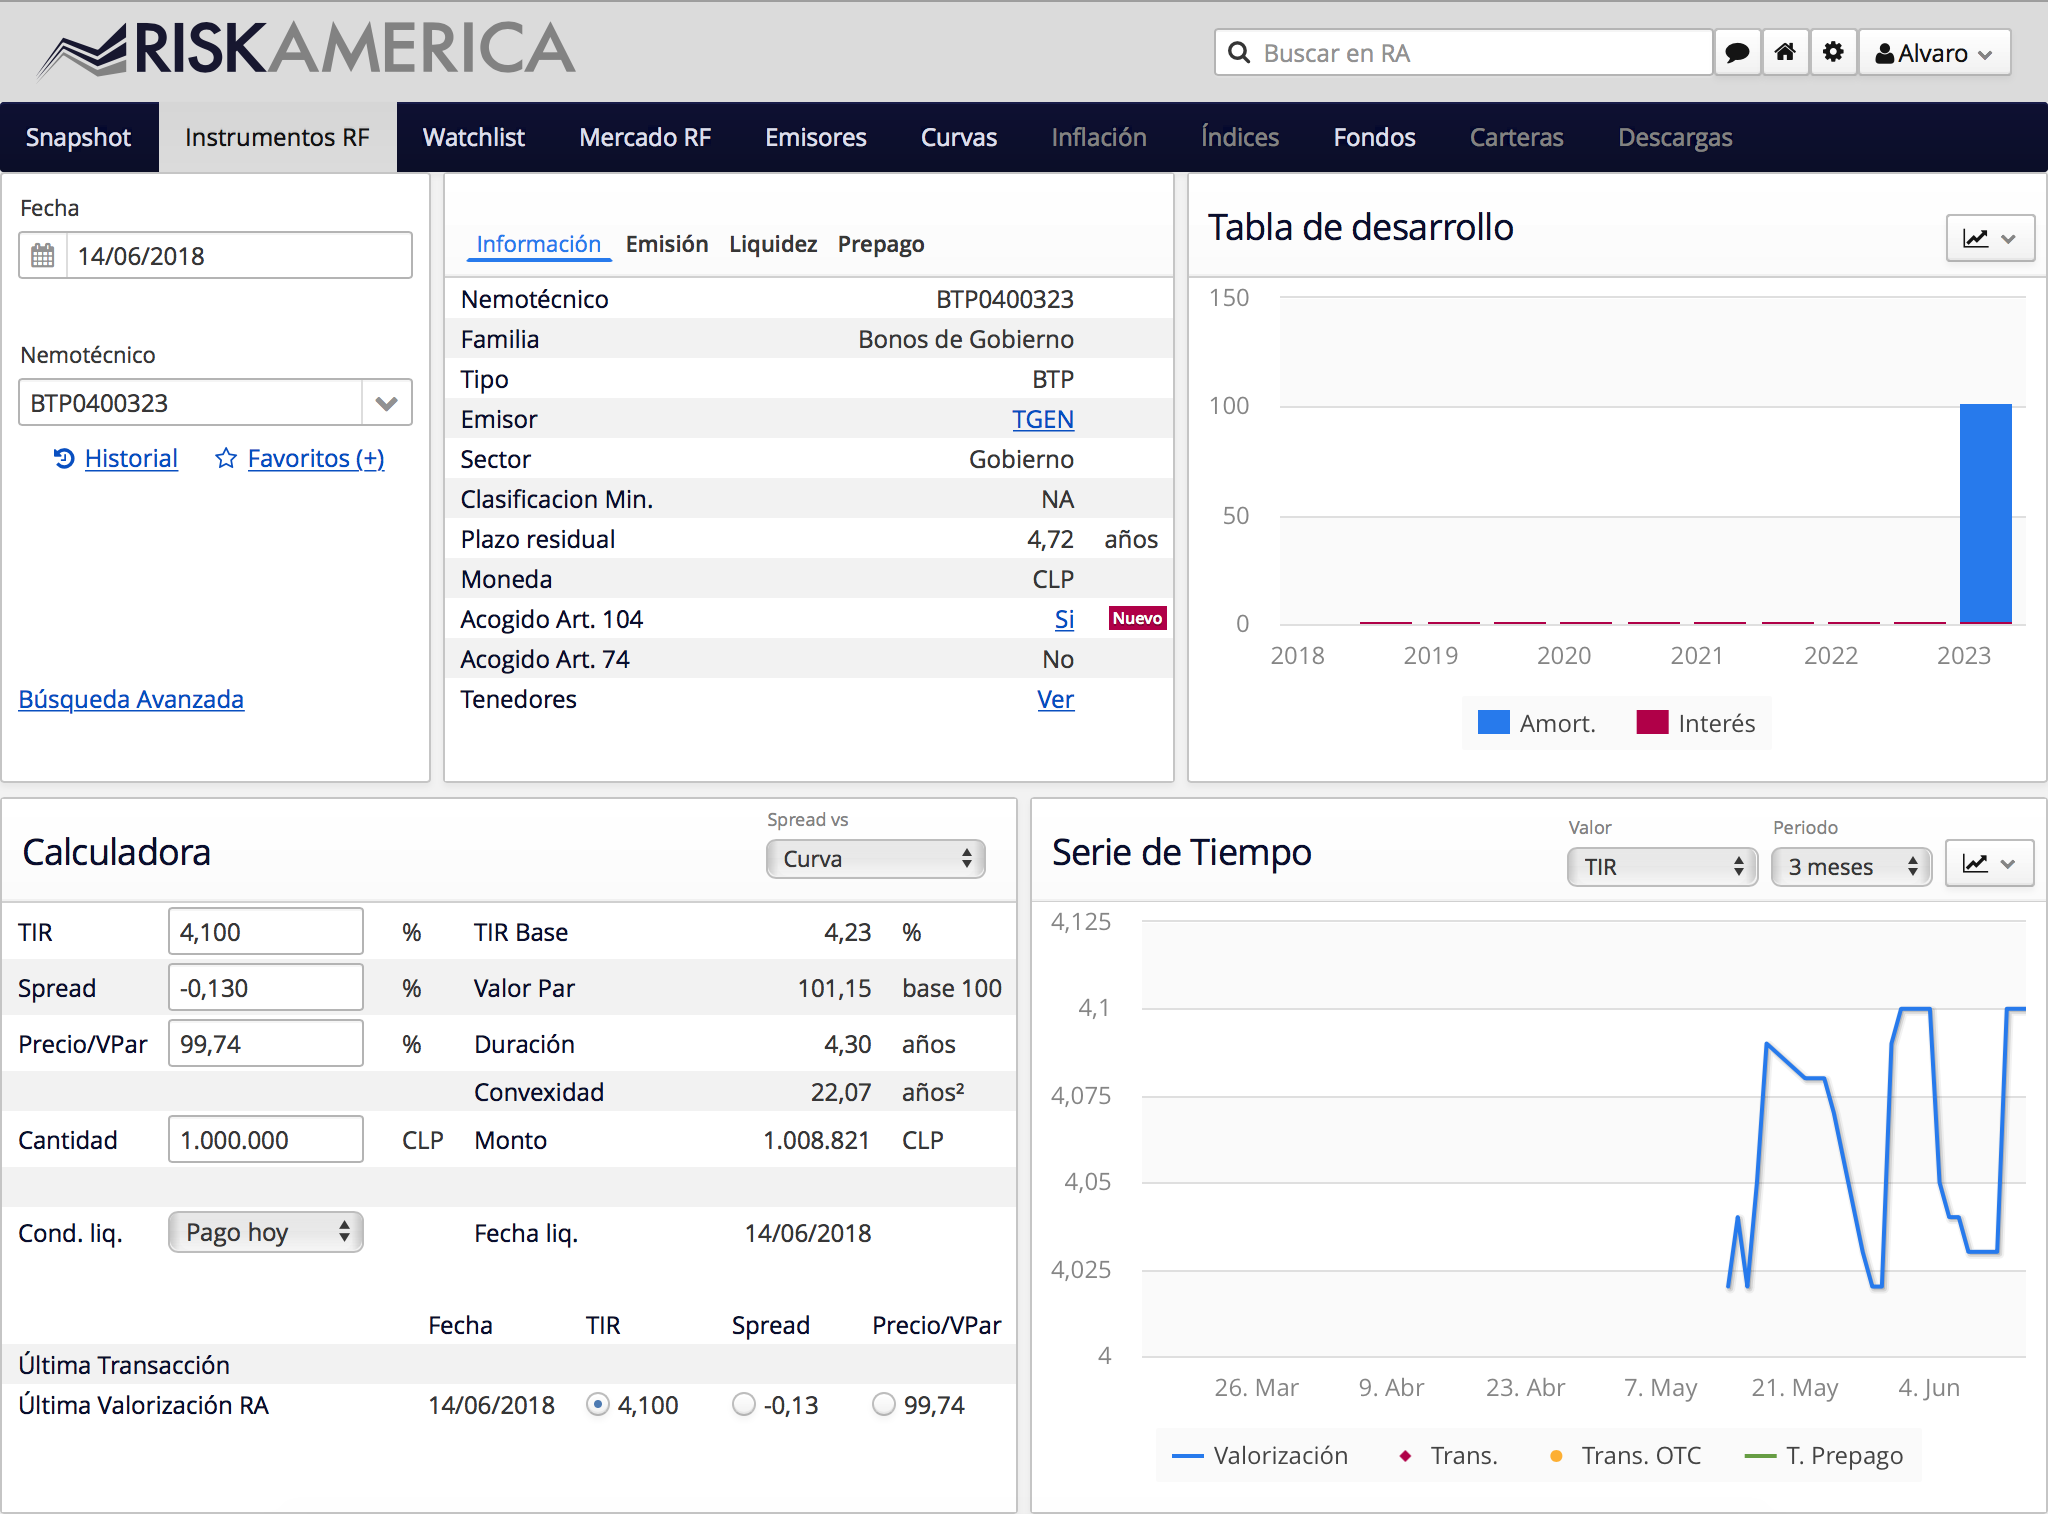

In [25]:
from IPython.display import Image
Image("RiskAmerica_1.png")